# Problem Statement : To make predictions on car mileage with multiple linear regression

# 1. Import the Libraries

In [126]:
# Data Science library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

# 2.Data Collection

In [127]:
df = pd.read_csv('C:/Users/Pritam/Downloads/mtcars.csv')

In [128]:
df.shape

(32, 12)

In [129]:
df.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [130]:
# split data into dependent and independent variable

In [131]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [132]:
x .head(2)

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [133]:
y .head(2)

0    21.0
1    21.0
Name: mpg, dtype: float64

In [134]:
x.shape

(32, 10)

In [135]:
y.shape

(32,)

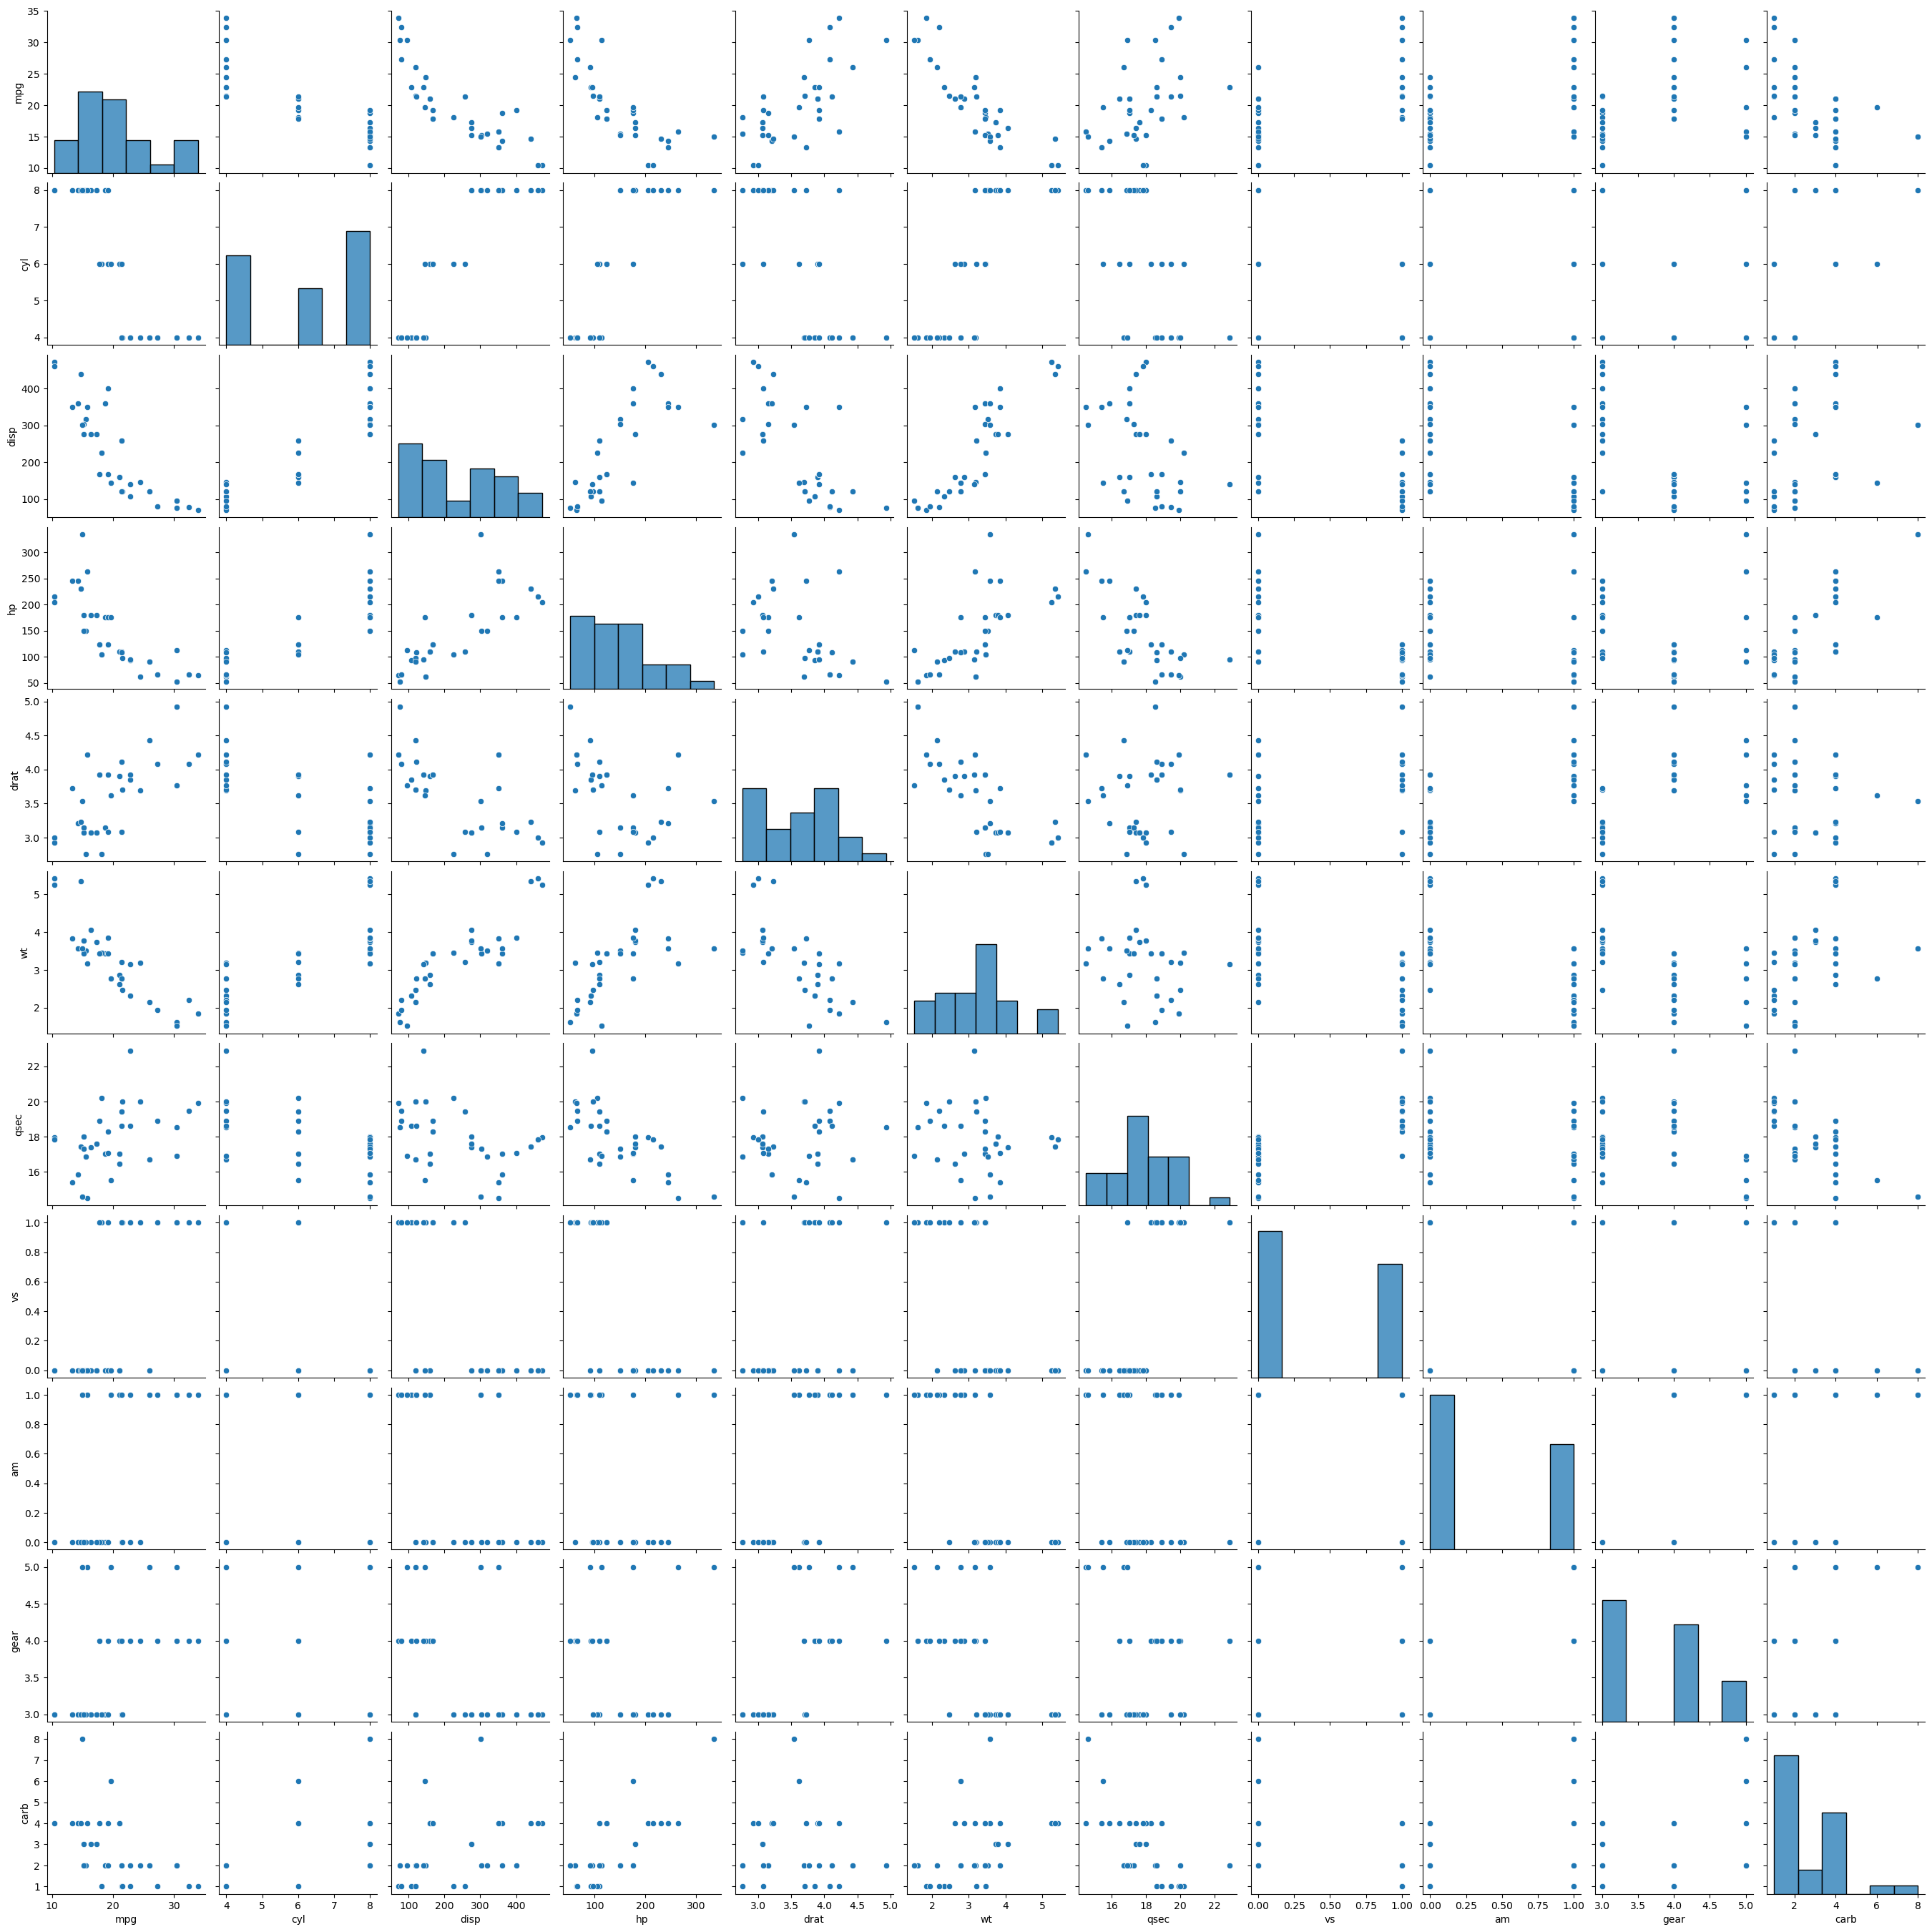

In [136]:
# check relation of features to target for that reason we plot the pair plot.
sns.pairplot(df)

## we import RandomForestRegressor for to check the score of importance of feature plot

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
x_train ,x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [139]:
model = RandomForestRegressor(n_estimators=100 ,random_state = 0)

In [141]:
model.fit(x_train ,y_train)

RandomForestRegressor(random_state=0)

### Here above training score is better as compared to testing score . because training model has very good data as compare to testing model

In [142]:
results =[]
for i in x_test :
    x_test_copy = x_test.copy()
    x_test_copy[i] = x_test[i].sample(frac = 1).values
    new_mse = mean_squared_error(y_test , model.predict(x_test_copy))
    new_rmse = np.sqrt(new_mse)
    results.append({'pred ': i,
                    'score':new_rmse - rmse})
    
    
resultsdf = pd.DataFrame(results).sort_values(by = 'score' , ascending = False)
    

###  from this score we have to undersood here we use three columns which having higher score. These names are disp , wt and hp

In [143]:
resultsdf

,pred,score
2,hp,2.087204
4,wt,1.444731
1,disp,1.374575
0,cyl,0.550735
5,qsec,0.191354
3,drat,0.140713
9,carb,0.122541
6,vs,0.072128
8,gear,0.016089
7,am,0.013076


### This plot for easy understanding of feature importance and  from graphical representation . its crystal clear for selection

Text(0.5, 1.0, 'permutation Feature importance plot')

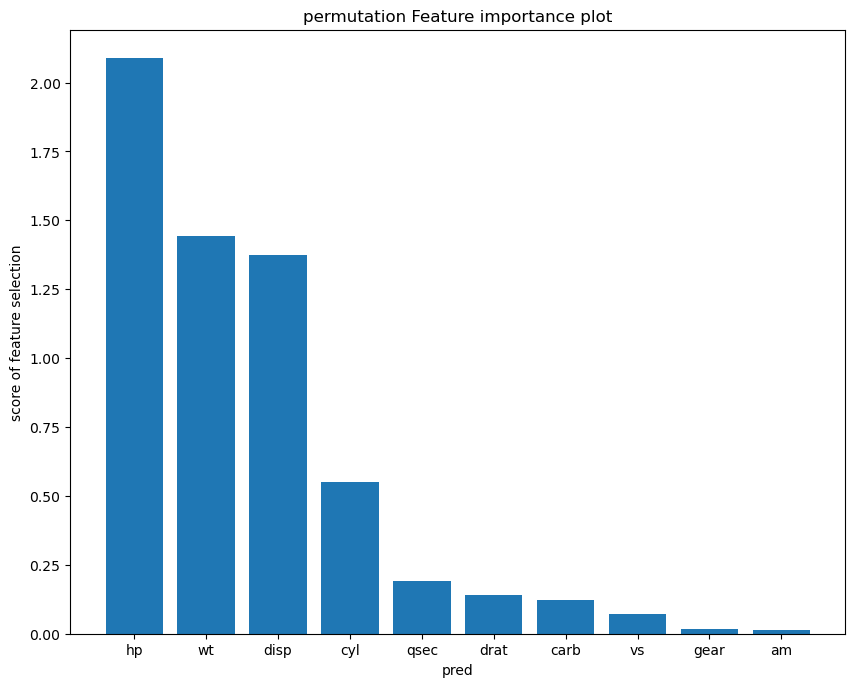

In [144]:
plt.bar(resultsdf['pred '] , resultsdf['score'])
plt.xlabel('pred')
plt.ylabel('score of feature selection')
plt.title('permutation Feature importance plot')
#plt.show()



In [145]:
df.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


### Here from score  or plot . we dplit data into independent variable and dependent variable for multiple linear regression

In [146]:
X = df.iloc[:,[3,4,6]]
Y = df.iloc[:,1]

In [147]:
X.head(2)

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875


In [148]:
Y.head(2)

0    21.0
1    21.0
Name: mpg, dtype: float64

## Build model of regression

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [150]:
X_train ,X_test , Y_train , Y_test = train_test_split(X ,Y ,test_size = 0.2 , random_state = 42)

In [151]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [152]:
model.fit(X_train , Y_train)

LinearRegression()

### check training model accuracy of regression model

In [153]:
training_score = model.score(X_train , Y_train)

In [154]:
training_score

0.832159844145282

In [155]:
training_score * 100

83.2159844145282

### check testing model accuracy  of regression model

In [156]:
testing_accuracy = model.score(X_test , Y_test)

In [157]:
testing_accuracy

0.7887740373160536

In [158]:
testing_accuracy * 100

78.87740373160536

### Here in linear_regression model ,training accuracy is high because of training model has best data as compare to trainin data

### prediction output for regression

In [159]:
Y_pred1 = model.predict(X_test)

In [160]:
Y_pred1 = pd.DataFrame(Y_pred1)

In [161]:
type(Y_test)

pandas.core.frame.DataFrame

In [162]:
type(Y_pred1)

pandas.core.frame.DataFrame

## Performance metrics or cost function or Evaluation metrics

### MSE

In [163]:
MSE = mean_squared_error(Y_test , Y_pred1)

In [164]:
MSE

8.445676134890643

### RMSE

In [165]:
RMSE = np.sqrt(MSE)

In [166]:
RMSE

2.9061445481755794

### R squared

In [167]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test , Y_pred1)

In [168]:
r2

0.7887740373160536

## MAE

In [169]:
MAE = mean_absolute_error(Y_test , Y_pred1)

In [170]:
MAE

2.2468613174856986

### Scatter plot for multiple regression

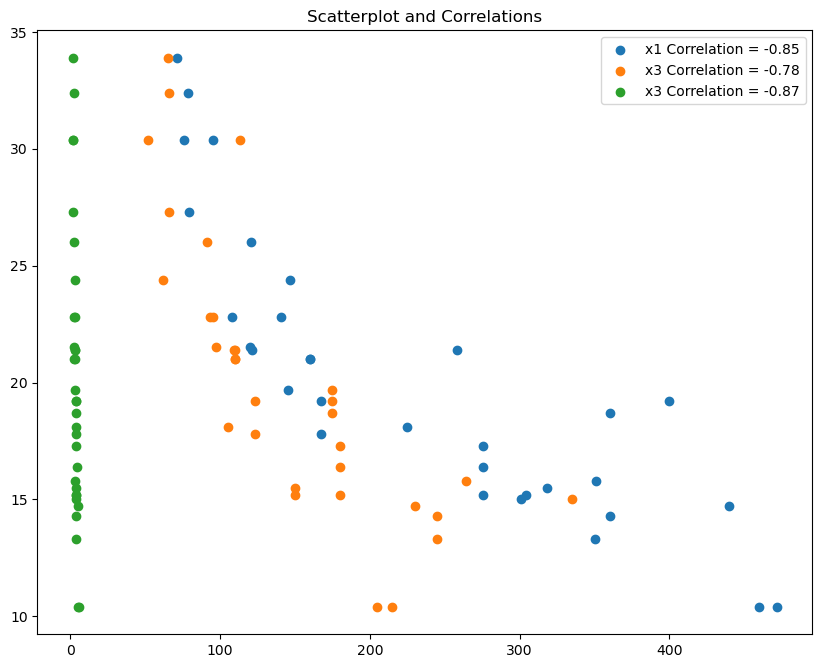

In [172]:
x1 = X.iloc[:,0]
x2 = X.iloc[:,1]
x3 = X.iloc[:,2]


# Plot
# plt.scatter(x1,Y,color='blue')
# plt.scatter(x2,Y,color= 'red')
# plt.scatter(x3,Y,color = 'magenta')
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# # Decorate
# plt.title('Color Change')
# plt.xlabel('X - value')
# plt.ylabel('Y - value')
# plt.show()


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x1, Y, label=f'x1 Correlation = {np.round(np.corrcoef(x1,Y)[0,1], 2)}')
plt.scatter(x2, Y, label=f'x3 Correlation = {np.round(np.corrcoef(x2,Y)[0,1], 2)}')
plt.scatter(x3, Y, label=f'x3 Correlation = {np.round(np.corrcoef(x3,Y)[0,1], 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

## OR

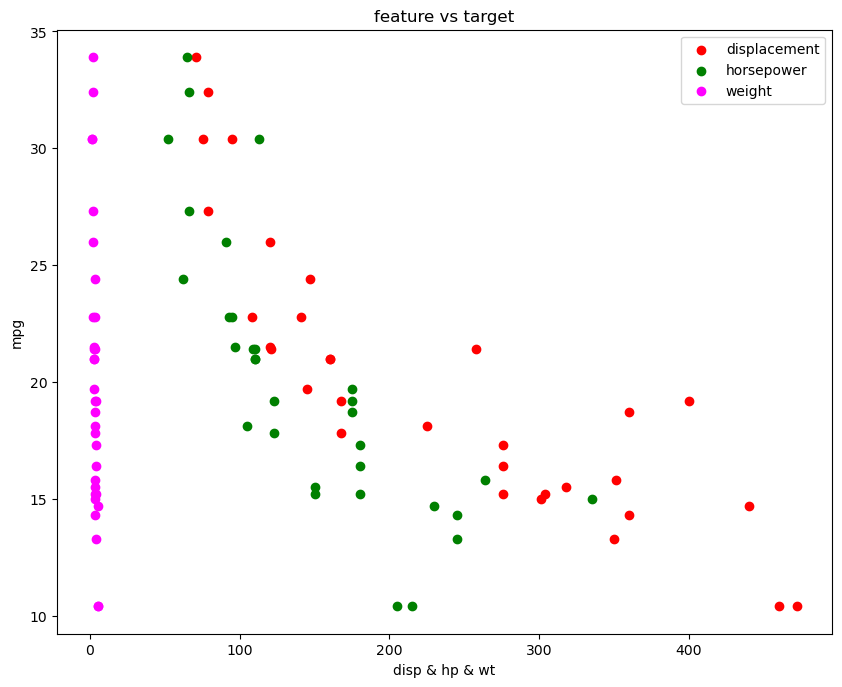

In [200]:
x1 = X.iloc[:,0]
x2 = X.iloc[:,1]
x3 = X.iloc[:,2]

plt.scatter(x1, Y ,color ='red')
plt.scatter(x2,Y,color ='green')
plt.scatter(x3,Y,color ='magenta')
plt.xlabel('disp & hp & wt')
plt.ylabel('mpg')
plt.title('feature vs target')
plt.legend(labels = ['displacement','horsepower','weight'])
